In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
from rdkit.Chem import rdFingerprintGenerator


## FP of agonists

In [3]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('OR_AGONIST_update.csv')

# Create an empty list to store fingerprints
fingerprints = []

# Initialize the Morgan Fingerprint generator
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

# Calculate Morgan fingerprint for each SMILES notation
for index, row in df.iterrows():
    smiles = row['SMILES']
    
    # Skip rows with missing or invalid SMILES strings (e.g., None)
    if not isinstance(smiles, str):
        fingerprints.append(None)
        continue
    
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if MolFromSmiles successfully created a valid molecule object
    if mol is not None:
        fp = morgan_gen.GetFingerprint(mol)
        fingerprints.append(fp.ToBitString())
    else:
        fingerprints.append(None)

# Add 'Fingerprint' column to the DataFrame and assign calculated fingerprints
df['Fingerprint'] = fingerprints

# Save updated DataFrame back to CSV file (overwrite existing file)
df.to_csv('OR_AGONIST_update2.csv', index=False)

print("Morgan fingerprint calculation completed!")
df.head(61)


Morgan fingerprint calculation completed!


,RECEPTOR,AGONIST,SMILES,Fingerprint
0,OR51E1,butyl butyryl lactate,CCCCOC(=O)C(C)OC(=O)CCC,0100000000000100000000000000000000000000000000...
1,NaN,valeric acid,CCCCC(=O)O,0000000000000000000000000000000000000000000000...
2,NaN,4-Methylvaleric acid,CC(C)CCC(=O)O,0100000000000000000000000000000000000000000000...
3,NaN,5-Norbornene-2-carboxylic acid,C1C2CC(C1C=C2)C(=O)O,0000000000000000000000000000000000000000000000...
4,NaN,2-Methylvaleric acid,CCCC(C)C(=O)O,0100000000000000000000000000000000000000000000...
...,...,...,...,...
56,NaN,propanoic acid,CCC(=O)O,0010000000000000000000000000000000000000000000...
57,NaN,19-hydroxyandrostenedione,CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34CO,0000000100000000000000000000000000000000000000...
58,NaN,(E)-beta-Ionone,CC1=C(C(CCC1)(C)C)C=CC(=O)C,0000000000000000000000000000000100000000000000...
59,NaN,(E)-alpha-Ionone,CC1=CCCC(C1C=CC(=O)C)(C)C,0000000000000000000100000000000100000000000000...


In [4]:
import pandas as pd
from rdkit import Chem

# Load the filtered fingerprints CSV file
df = pd.read_csv('OR_AGONIST_update2.csv')

# Create a new column 'Molecule' with RDKit Mol objects
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)

# Define a function to check if a molecule is cyclic
def is_cyclic(mol):
    return any(atom.IsInRing() for atom in mol.GetAtoms())

# Create a new column 'IsCyclic' indicating whether a molecule is cyclic or not
df['IsCyclic'] = df['Molecule'].apply(is_cyclic)

# Filter out cyclic molecules
df_filtered = df[~df['IsCyclic']]

# Save the filtered dataframe to a new CSV file
df_filtered[['SMILES', 'Fingerprint']].to_csv('OR_AGONIST_update2_NOCYC.csv', index=False)

## FP of KFOs

In [5]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Smiles.csv')

# Create an empty list to store fingerprints
fingerprints = []

# Initialize the Morgan Fingerprint generator
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

# Calculate Morgan fingerprint for each SMILES notation
for index, row in df.iterrows():
    smiles = row['SMILES']
    
    # Skip rows with missing or invalid SMILES strings (e.g., None)
    if not isinstance(smiles, str):
        fingerprints.append(None)
        continue
    
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if MolFromSmiles successfully created a valid molecule object
    if mol is not None:
        fp = morgan_gen.GetFingerprint(mol)
        fingerprints.append(fp.ToBitString())
    else:
        fingerprints.append(None)

# Add 'Fingerprint' column to the DataFrame and assign calculated fingerprints
df['Fingerprint'] = fingerprints

# Save updated DataFrame back to CSV file (overwrite existing file)
df.to_csv('smilesfpm.csv', index=False)

print("Morgan fingerprint calculation completed!")
df.head(277)


Morgan fingerprint calculation completed!


,SMILES,Fingerprint
0,CSCCC=O,0000000000010000000000000000000000000000000000...
1,CCC(C)C=O,0100000000000000000000000000000000000000000000...
2,CC(=O)C(C)=O,0000000000000000000000000000000000000000000000...
3,CCCCC/C=C/C=C/C=O,0000000000000000000000000000000000000000000000...
4,CC1OC(=C(O)C1=O)C,0000000000000000000000000000000000000000000000...
...,...,...
218,CCCSSCCC,0000000000000000000000000000000000000000000000...
219,CCOC(=O)CCC(C)C,0100000000000000000000000000000000000000000000...
220,CCOC(=O)CCSC,0000000000010000000000000000000000000000000000...
221,CCCC[C@@H](CC)CCC([O-])=O,0100000000000000000000000000000000000000000000...


In [6]:
import pandas as pd
from rdkit import Chem

# Load the filtered fingerprints CSV file
df = pd.read_csv('smilesfpm.csv')

# Create a new column 'Molecule' with RDKit Mol objects
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)

# Define a function to check if a molecule is cyclic
def is_cyclic(mol):
    return any(atom.IsInRing() for atom in mol.GetAtoms())

# Create a new column 'IsCyclic' indicating whether a molecule is cyclic or not
df['IsCyclic'] = df['Molecule'].apply(is_cyclic)

# Filter out cyclic molecules
df_filtered = df[~df['IsCyclic']]

# Save the filtered dataframe to a new CSV file
df_filtered[['SMILES', 'Fingerprint']].to_csv('smilesfpm_NOCYC.csv', index=False)

In [7]:
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv('OR_AGONIST_update2_NOCYC.csv')
    df2 = pd.read_csv('smilesfpm_NOCYC.csv')

    # Print unique SMILES in df1 and df2
    print("Unique SMILES in df1:", len(df1['SMILES'].unique()))
    print("Unique SMILES in df2:", len(df2['SMILES'].unique()))

    # Drop common SMILES from second dataset if any
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    print("Common SMILES:", common_smiles)

    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

Unique SMILES in df1: 36
Unique SMILES in df2: 115
Common SMILES: {'CCCCCCO', 'CCC=O', 'CCCCCC(=O)C=C', 'CSSC', 'CCCCCCCCC=O', 'CCCCCCCC(=O)OCC', 'CCCCCCCC=O'}


In [8]:
import pandas as pd
from rdkit import Chem
import numpy as np

# Load the filtered fingerprints CSV file
df = pd.read_csv('smilesfpm.csv')
print("Original dataframe shape:", df.shape)

# Create a new column 'Molecule' with RDKit Mol objects
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)

# Define a function to check if a molecule is cyclic
def is_cyclic(mol):
    if mol is None:
        return False
    return any(atom.IsInRing() for atom in mol.GetAtoms())

# Create a new column 'IsCyclic' indicating whether a molecule is cyclic or not
df['IsCyclic'] = df['Molecule'].apply(is_cyclic)

# Print the number of cyclic and non-cyclic molecules
print("Number of cyclic molecules:", df['IsCyclic'].sum())
print("Number of non-cyclic molecules:", (~df['IsCyclic']).sum())

# Filter out cyclic molecules
df_filtered = df[~df['IsCyclic']]
print("Filtered dataframe shape:", df_filtered.shape)

# Check for any None values in the 'Molecule' column
print("Number of None values in 'Molecule' column:", df_filtered['Molecule'].isnull().sum())

# Save the filtered dataframe to a new CSV file
df_filtered[['SMILES', 'Fingerprint']].to_csv('smilesfpm_NOCYC.csv', index=False)

# Load the fingerprint files into dataframes
df1 = pd.read_csv('OR_AGONIST_update2_NOCYC.csv')
df2 = pd.read_csv('smilesfpm_NOCYC.csv')

# Print shapes of dataframes
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)

# Print unique SMILES in df1 and df2
print("Unique SMILES in df1:", len(df1['SMILES'].unique()))
print("Unique SMILES in df2:", len(df2['SMILES'].unique()))

# Drop common SMILES from second dataset if any
common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
print("Number of common SMILES:", len(common_smiles))
print("Common SMILES:", common_smiles)

df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)
print("Shape of df2_filtered:", df2_filtered.shape)

# Print a few sample fingerprints
print("\nSample fingerprints from df1:")
print(df1['Fingerprint'].head())
print("\nSample fingerprints from df2_filtered:")
print(df2_filtered['Fingerprint'].head())

# Check if fingerprints are all the same
print("\nAre all fingerprints in df1 the same?", df1['Fingerprint'].nunique() == 1)
print("Are all fingerprints in df2_filtered the same?", df2_filtered['Fingerprint'].nunique() == 1)

# Convert a few fingerprints to numpy arrays and print them
def fingerprint_to_array(fp_string):
    return np.array([int(bit) for bit in fp_string])

print("\nSample fingerprint arrays from df1:")
print(fingerprint_to_array(df1['Fingerprint'].iloc[0])[:20])
print(fingerprint_to_array(df1['Fingerprint'].iloc[1])[:20])

print("\nSample fingerprint arrays from df2_filtered:")
print(fingerprint_to_array(df2_filtered['Fingerprint'].iloc[0])[:20])
print(fingerprint_to_array(df2_filtered['Fingerprint'].iloc[1])[:20])

Original dataframe shape: (223, 2)
Number of cyclic molecules: 107
Number of non-cyclic molecules: 116
Filtered dataframe shape: (116, 4)
Number of None values in 'Molecule' column: 0
Shape of df1: (40, 2)
Shape of df2: (116, 2)
Unique SMILES in df1: 36
Unique SMILES in df2: 115
Number of common SMILES: 7
Common SMILES: {'CCCCCCO', 'CCC=O', 'CCCCCC(=O)C=C', 'CSSC', 'CCCCCCCCC=O', 'CCCCCCCC(=O)OCC', 'CCCCCCCC=O'}
Shape of df2_filtered: (109, 2)

Sample fingerprints from df1:
0    0100000000000100000000000000000000000000000000...
1    0000000000000000000000000000000000000000000000...
2    0100000000000000000000000000000000000000000000...
3    0100000000000000000000000000000000000000000000...
4    0100000000000000000000000000000000000000000000...
Name: Fingerprint, dtype: object

Sample fingerprints from df2_filtered:
0    0000000000010000000000000000000000000000000000...
1    0100000000000000000000000000000000000000000000...
2    0000000000000000000000000000000000000000000000...
3    000

## Various distance metrics for similarity calculation using the fingerprints

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
print("Length of a fingerprint:", len(df1['Fingerprint'].iloc[0]))
print("Number of 1s in a fingerprint:", df1['Fingerprint'].iloc[0].count('1'))

Length of a fingerprint: 2048
Number of 1s in a fingerprint: 27


In [11]:
from rdkit import DataStructs
fp1 = DataStructs.CreateFromBitString(df1['Fingerprint'].iloc[0])
fp2 = DataStructs.CreateFromBitString(df2_filtered['Fingerprint'].iloc[0])
print("Tanimoto similarity:", DataStructs.TanimotoSimilarity(fp1, fp2))

Tanimoto similarity: 0.07692307692307693


In [12]:
def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)
    similarity = np.count_nonzero(intersection) / np.count_nonzero(union)
    return 1 - similarity

u = fingerprint_to_array(df1['Fingerprint'].iloc[0])
v = fingerprint_to_array(df2_filtered['Fingerprint'].iloc[0])
print("Custom Tanimoto distance:", tanimoto_distance(u, v))

Custom Tanimoto distance: 0.9230769230769231


In [13]:
from scipy.spatial.distance import hamming, cosine, euclidean
print("Hamming distance:", hamming(u, v))
print("Cosine distance:", cosine(u, v))
print("Euclidean distance:", euclidean(u, v))

Hamming distance: 0.017578125
Cosine distance: 0.850928801500014
Euclidean distance: 6.0


In [14]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from scipy.spatial.distance import cdist

def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)
    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str, output_csv_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

    # Drop common SMILES from second dataset if any 
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)
    print("Common SMILES:", common_smiles)

    # Convert binary string fingerprints to numpy arrays for both datasets
    fingerprints1_np = np.array([list(map(int, fp)) for fp in df1['Fingerprint']])
    fingerprints2_np = np.array([list(map(int, fp)) for fp in df2_filtered['Fingerprint']])

    print("Fingerprints1 shape:", fingerprints1_np.shape)
    print("Fingerprints2 shape:", fingerprints2_np.shape)
    print("df2_filtered shape:", df2_filtered.shape)
    print("Number of unique SMILES in df2_filtered:", len(df2_filtered['SMILES'].unique()))
    print("df2 shape:", df2.shape)
    print("Number of unique SMILES in df2:", len(df2['SMILES'].unique()))

    # Calculate distance matrices
    hamming_dist_matrix = cdist(fingerprints1_np, fingerprints2_np, metric='hamming')
    cosine_dist_matrix = cdist(fingerprints1_np, fingerprints2_np, metric='cosine')
    euclidean_dist_matrix = cdist(fingerprints1_np, fingerprints2_np, metric='euclidean')

    # Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
        for j in range(len(df2_filtered)):
            tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

    # Create a dictionary to store similarity scores with SMILES strings for each distance metric 
    similarity_scores_dict = {}

    for i in range(len(df1)):
        similarity_scores_dict[i] = {
            'SMILES': df1.loc[i, 'SMILES'],
            'Hamming Distance': hamming_dist_matrix[i].min(),
            'Cosine Distance': cosine_dist_matrix[i].min(),
            'Euclidean Distance': euclidean_dist_matrix[i].min(),
            'Tanimoto Distance': tanimoto_dist_matrix[i].min()
        }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame.from_dict(similarity_scores_dict, orient='index')

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Hamming Distance', 'Cosine Distance',
                                                      'Euclidean Distance', 'Tanimoto Distance'])

    # Get the indices of the most similar molecules in df2_filtered
    most_similar_indices = np.argmin(tanimoto_dist_matrix, axis=1)

    # Get the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[most_similar_indices, 'SMILES'].reset_index(drop=True)

    # Add the most similar SMILES to the sorted_similarity_df
    sorted_similarity_df['Most Similar SMILES'] = most_similar_smiles

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(sorted_similarity_df)

    # Save the results to a CSV file
    sorted_similarity_df.to_csv(output_csv_path, index=False)
    print(f"Results saved to {output_csv_path}")

    return most_similar_smiles, sorted_similarity_df

# Usage
if __name__ == "__main__":
    file1_path = "OR_AGONIST_update2.csv"
    file2_path = "smilesfpm.csv"
    output_csv_path = "similarity_results.csv"

    most_similar_molecules, similarity_df = find_most_similar_molecules(file1_path, file2_path, output_csv_path)

Common SMILES: {'CCCCCCO', 'CCC=O', 'C1=CC=C2C(=C1)C=CC(=O)O2', 'CCCCCC(=O)C=C', 'COC1=C(C=C(C=C1)CC=C)OC', 'CCCCCCCCC=O', 'CSSC', 'CCCCCCCC(=O)OCC', 'COC1=CC=CC=C1O', 'CCCCCCCC=O'}
Fingerprints1 shape: (61, 2048)
Fingerprints2 shape: (212, 2048)
df2_filtered shape: (212, 2)
Number of unique SMILES in df2_filtered: 210
df2 shape: (223, 2)
Number of unique SMILES in df2: 220
Most similar SMILES:
0                     CCCCOC(C)=O
1                      CCCCC(O)=O
2                 CCOC(=O)CCC(C)C
3                         CC(O)=O
4                    CCC(C)C(O)=O
                 ...             
56                       CCC(O)=O
57           CC1C2CCC(=CC2OC1=O)C
58    CC(=O)/C=C/C1=C(C)CCCC1(C)C
59    CC(=O)/C=C/C1=C(C)CCCC1(C)C
60                   CC(=O)C(C)=O
Name: SMILES, Length: 61, dtype: object

Distance Values:
                                      SMILES  Hamming Distance  \
8                             CCCCCCCCC(=O)O          0.000000   
11                                 CCC

## descriptor calculation 

In [15]:
!pip install mordred
!pip install umap
!pip install tqdm
!pip install seaborn

In [16]:
from rdkit.Chem import PandasTools

In [17]:
import os,re,sys,pickle,datetime,time,random,itertools
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from scipy import stats
import math
from tqdm import tqdm
import seaborn as sns
import umap
from multiprocessing import freeze_support
import mordred
from mordred import Calculator, descriptors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,NMF
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
import rdkit
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MolFromSmiles, PandasTools, Descriptors, Draw, PropertyMol, rdmolfiles, rdFMCS
from rdkit import RDConfig
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import MolsToGridImage, IPythonConsole, rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions, Font
DrawingOptions.bondLineWidth=1.8
DrawingOptions.includeAtomNumbers=False
size = (150, 150)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
randomstate = 42

In [18]:
# Load the fingerprint files into dataframes
df1 = pd.read_csv('OR_AGONIST_update2_NOCYC.csv')
df2 = pd.read_csv('smilesfpm_NOCYC.csv')

# Merge the two dataframes vertically
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save the merged dataframe to a CSV file
merged_df.to_csv('merged_fingerprints_NOCYC.csv', index=False)

In [19]:
filepath1 = "merged_fingerprints_NOCYC.csv"
mols = pd.read_csv(filepath1)
mols

,SMILES,Fingerprint
0,CCCCOC(=O)C(C)OC(=O)CCC,0100000000000100000000000000000000000000000000...
1,CCCCC(=O)O,0000000000000000000000000000000000000000000000...
2,CC(C)CCC(=O)O,0100000000000000000000000000000000000000000000...
3,CCCC(C)C(=O)O,0100000000000000000000000000000000000000000000...
4,CCC(C)CC(=O)O,0100000000000000000000000000000000000000000000...
...,...,...
151,CSSC,0000000000000000000000000000000000000100000000...
152,CCCSSCCC,0000000000000000000000000000000000000000000000...
153,CCOC(=O)CCC(C)C,0100000000000000000000000000000000000000000000...
154,CCOC(=O)CCSC,0000000000010000000000000000000000000000000000...


In [20]:
mols['rdmol'] = mols['SMILES'].map(lambda x: Chem.MolFromSmiles(x))
mols['inchi'] = mols['rdmol'].map(Chem.MolToInchi)
mols = mols.drop_duplicates(subset="inchi")

print('Number of SMILES after duplicates removed:',len(mols))

mols

Number of SMILES after duplicates removed: 135


[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Proton(s) added/removed

[01:08:07] WARNING: Proton(s) added/removed

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefined stereo

[01:08:07] WARNING: Omitted undefine

,SMILES,Fingerprint,rdmol,inchi
0,CCCCOC(=O)C(C)OC(=O)CCC,0100000000000100000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369335a0>,InChI=1S/C11H20O4/c1-4-6-8-14-11(13)9(3)15-10(...
1,CCCCC(=O)O,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369326c0>,"InChI=1S/C5H10O2/c1-2-3-4-5(6)7/h2-4H2,1H3,(H,..."
2,CC(C)CCC(=O)O,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x136933140>,"InChI=1S/C6H12O2/c1-5(2)3-4-6(7)8/h5H,3-4H2,1-..."
3,CCCC(C)C(=O)O,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x136932f80>,"InChI=1S/C6H12O2/c1-3-4-5(2)6(7)8/h5H,3-4H2,1-..."
4,CCC(C)CC(=O)O,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x136933680>,"InChI=1S/C6H12O2/c1-3-5(2)4-6(7)8/h5H,3-4H2,1-..."
...,...,...,...,...
150,C=CCS[S](=O)CC=C,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369d40b0>,"InChI=1S/C6H10OS2/c1-3-5-8-9(7)6-4-2/h3-4H,1-2..."
152,CCCSSCCC,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369d4190>,"InChI=1S/C6H14S2/c1-3-5-7-8-6-4-2/h3-6H2,1-2H3"
153,CCOC(=O)CCC(C)C,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369d4200>,"InChI=1S/C8H16O2/c1-4-10-8(9)6-5-7(2)3/h7H,4-6..."
154,CCOC(=O)CCSC,0000000000010000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369d4270>,"InChI=1S/C6H12O2S/c1-3-8-6(7)4-5-9-2/h3-5H2,1-2H3"


In [21]:
def embed(mol):
    mol_with_H = Chem.AddHs(mol)
    Chem.AllChem.EmbedMolecule(mol_with_H)
    Chem.AllChem.MMFFOptimizeMolecule(mol_with_H)
    return mol_with_H

mols['rdmol_optimized'] = mols.rdmol.map(embed)

mols

,SMILES,Fingerprint,rdmol,inchi,rdmol_optimized
0,CCCCOC(=O)C(C)OC(=O)CCC,0100000000000100000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369335a0>,InChI=1S/C11H20O4/c1-4-6-8-14-11(13)9(3)15-10(...,<rdkit.Chem.rdchem.Mol object at 0x1369d4f90>
1,CCCCC(=O)O,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369326c0>,"InChI=1S/C5H10O2/c1-2-3-4-5(6)7/h2-4H2,1H3,(H,...",<rdkit.Chem.rdchem.Mol object at 0x1369d5e70>
2,CC(C)CCC(=O)O,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x136933140>,"InChI=1S/C6H12O2/c1-5(2)3-4-6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x1369d6c00>
3,CCCC(C)C(=O)O,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x136932f80>,"InChI=1S/C6H12O2/c1-3-4-5(2)6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x1369d5ee0>
4,CCC(C)CC(=O)O,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x136933680>,"InChI=1S/C6H12O2/c1-3-5(2)4-6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x1369d58c0>
...,...,...,...,...,...
150,C=CCS[S](=O)CC=C,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369d40b0>,"InChI=1S/C6H10OS2/c1-3-5-8-9(7)6-4-2/h3-4H,1-2...",<rdkit.Chem.rdchem.Mol object at 0x1369c8970>
152,CCCSSCCC,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369d4190>,"InChI=1S/C6H14S2/c1-3-5-7-8-6-4-2/h3-6H2,1-2H3",<rdkit.Chem.rdchem.Mol object at 0x1369c89e0>
153,CCOC(=O)CCC(C)C,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369d4200>,"InChI=1S/C8H16O2/c1-4-10-8(9)6-5-7(2)3/h7H,4-6...",<rdkit.Chem.rdchem.Mol object at 0x1369c8a50>
154,CCOC(=O)CCSC,0000000000010000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x1369d4270>,"InChI=1S/C6H12O2S/c1-3-8-6(7)4-5-9-2/h3-5H2,1-2H3",<rdkit.Chem.rdchem.Mol object at 0x1369c8ac0>


In [36]:
calc = Calculator(descriptors) # create calculator for all mordred descriptors (can also specify subtype)

df=calc.pandas(mols['rdmol_optimized'])
print(df)

100%|██████████| 135/135 [00:04<00:00, 28.93it/s]


                                                   ABC  \
0    module 'numpy' has no attribute 'float'.\n`np....   
1    module 'numpy' has no attribute 'float'.\n`np....   
2    module 'numpy' has no attribute 'float'.\n`np....   
3    module 'numpy' has no attribute 'float'.\n`np....   
4    module 'numpy' has no attribute 'float'.\n`np....   
..                                                 ...   
150  module 'numpy' has no attribute 'float'.\n`np....   
152  module 'numpy' has no attribute 'float'.\n`np....   
153  module 'numpy' has no attribute 'float'.\n`np....   
154  module 'numpy' has no attribute 'float'.\n`np....   
155  module 'numpy' has no attribute 'float'.\n`np....   

                                                 ABCGG  nAcid  nBase  \
0    module 'numpy' has no attribute 'float'.\n`np....      0      0   
1    module 'numpy' has no attribute 'float'.\n`np....      1      0   
2    module 'numpy' has no attribute 'float'.\n`np....      1      0   
3    module 'nu

In [23]:
#Replace mordred errors with NaNs then drop those descriptors/columns
df=df.applymap(lambda x: np.nan if type(x) in [mordred.error.Missing,mordred.error.Error] else x)
df=df.dropna(axis=1)
print(df.shape)

(135, 1118)


In [24]:
#Dropping columns that have a single value
non_zero_std = df.std() != 0
df = df [non_zero_std[non_zero_std].index]
print(df.shape)

(135, 801)


## Dropping highly correlated descriptors: If a pair of descriptors have a Pearson correlation coefficient (r) value greater than the threshold then one descriptor will be removed.

In [25]:
threshold=0.95
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df = df.drop(to_drop, axis=1)
print(df.shape)

(135, 349)


In [26]:
#saving the csv list
to_save=pd.concat([mols[['SMILES']], df], axis=1)
to_save

,SMILES,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VR1_A,nHetero,nO,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10
0,CCCCOC(=O)C(C)OC(=O)CCC,0,0,17.250180,2.180397,1.150012,3.536894,86.757752,4,4,...,0.097222,0.054688,0.037333,0.025641,0.014842,0.007812,0.009877,0.005,0.008264,0.474966
1,CCCCC(=O)O,1,0,7.727407,1.931852,1.103915,2.752227,16.819499,2,2,...,0.074074,0.062500,0.053333,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.439907
2,CC(C)CCC(=O)O,1,0,8.472136,2.000000,1.059017,2.899228,19.357315,2,2,...,0.083333,0.050000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.570476
3,CCCC(C)C(=O)O,1,0,8.647053,2.074313,1.080882,2.900310,21.298450,2,2,...,0.138889,0.053571,0.040000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.518175
4,CCC(C)CC(=O)O,1,0,8.565187,2.042079,1.070648,2.899769,19.937685,2,2,...,0.083333,0.083333,0.032000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.555810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,C=CCS[S](=O)CC=C,0,0,10.383983,2.015316,1.153776,3.007982,28.081310,3,1,...,0.083333,0.053571,0.026667,0.013889,0.020408,0.000000,0.000000,0.000,0.000000,0.385368
152,CCCSSCCC,0,0,9.517541,1.879385,1.189693,2.876615,21.482988,2,0,...,0.037037,0.025000,0.020000,0.018519,0.020408,0.000000,0.000000,0.000,0.000000,0.192392
153,CCOC(=O)CCC(C)C,0,0,11.127090,2.052881,1.112709,3.123647,30.761798,2,2,...,0.088889,0.046875,0.045714,0.018519,0.027211,0.000000,0.000000,0.000,0.000000,0.504985
154,CCOC(=O)CCSC,0,0,10.383983,2.015316,1.153776,3.007982,28.081310,3,2,...,0.083333,0.053571,0.026667,0.013889,0.020408,0.000000,0.000000,0.000,0.000000,0.385368


In [27]:
to_save.to_csv('mordred_descriptors_updated_agonist.csv', index = True)
df.head(72)

,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VR1_A,nHetero,nO,nS,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10
0,0,0,17.250180,2.180397,1.150012,3.536894,86.757752,4,4,0,...,0.097222,0.054688,0.037333,0.025641,0.014842,0.007812,0.009877,0.005,0.008264,0.474966
1,1,0,7.727407,1.931852,1.103915,2.752227,16.819499,2,2,0,...,0.074074,0.062500,0.053333,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.439907
2,1,0,8.472136,2.000000,1.059017,2.899228,19.357315,2,2,0,...,0.083333,0.050000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.570476
3,1,0,8.647053,2.074313,1.080882,2.900310,21.298450,2,2,0,...,0.138889,0.053571,0.040000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.518175
4,1,0,8.565187,2.042079,1.070648,2.899769,19.937685,2,2,0,...,0.083333,0.083333,0.032000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.555810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,0,8.054679,1.847759,1.150668,2.739193,16.799928,1,1,0,...,0.044444,0.031250,0.026667,0.027778,0.000000,0.000000,0.000000,0.000,0.000000,0.213472
81,1,0,6.000000,2.000000,1.000000,2.610845,11.530010,2,2,0,...,0.148148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.548148
82,0,0,13.191508,1.931852,1.199228,3.202455,38.458677,1,1,0,...,0.024691,0.015625,0.011429,0.009259,0.008163,0.007812,0.008230,0.010,0.000000,0.145210
83,0,0,12.133645,2.047810,1.103059,3.219224,36.126569,1,1,0,...,0.080808,0.055556,0.020000,0.037037,0.013605,0.020833,0.000000,0.000,0.000000,0.477839


## Performing the PCA using the obtained descriptors

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Convert index to integer and drop rows with missing values
df.index = df.index.astype(int)
df.dropna(axis=0, inplace=True)

# Select only numeric columns for PCA
numeric_df = df.select_dtypes(include=[np.number])

# If you want to keep track of non-numeric columns (like SMILES strings), you can do this:
non_numeric_df = df.select_dtypes(exclude=[np.number])

# Proceed with PCA on the numeric data
X_all = np.array(numeric_df)
X_all_ids = np.array(numeric_df.index)

scaler = StandardScaler()
X_all_sc = scaler.fit_transform(X_all)  # Use fit_transform instead of transform

pca = PCA(n_components=30)  # choose number of PCs
X_all_pca = pca.fit_transform(X_all_sc)  # Use fit_transform instead of transform

pca_score = pca.explained_variance_ratio_
pca_values = pca.singular_values_
print('Variance explained by individual PCs:', np.around(pca.explained_variance_ratio_, decimals=2), '\n')
print('Total variance explained by PCs:', np.around(np.sum(pca.explained_variance_ratio_), decimals=2))

# Recreate DataFrame with original index after PCA transformation
df_pca = pd.DataFrame(X_all_pca, index=X_all_ids)

# If you want to combine the PCA results with the non-numeric data, you can do this:
df_pca_combined = pd.concat([df_pca, non_numeric_df], axis=1)

print(df_pca_combined.head())


Variance explained by individual PCs: [0.41 0.14 0.08 0.05 0.04 0.03 0.03 0.02 0.02 0.02 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.  ] 

Total variance explained by PCs: 0.97
           0          1          2          3         4         5         6  \
0  47.452364 -14.996785  11.890748  18.096800  0.701462 -0.332449  8.421519   
1  -8.619783 -11.900131  -0.858159   1.638328  4.246484  4.304651 -4.330669   
2  -2.641956 -11.044787   2.596997   0.722201 -0.022716  3.187267 -6.758711   
3  -2.652680 -12.064824   3.303724  -1.378760 -0.609304  1.915501 -3.227065   
4  -2.561068 -11.738917   2.965873  -0.902038 -0.671710  1.440357 -5.573737   

          7         8         9  ...                           MDEN-12  \
0  4.384021 -2.377246 -5.374118  ...  float division by zero (MDEN-12)   
1  3.848274 -1.331915  2.289196  ...  float division by zero (MDEN-12)   
2  1.798020  0.499157  3.848776  ...  float division by zero (MDEN-12)   

## Potting and Analyzing the Scree Plot to find the optimal number of components. A variance of 0.95 is retained that helps us keep a good majority of features while reducing the components greatly!
In the scree plot, the variance explained stabilizes after 30 components, indicating diminishing returns in capturing additional information. Therefore n=30 is the optimal number of components.

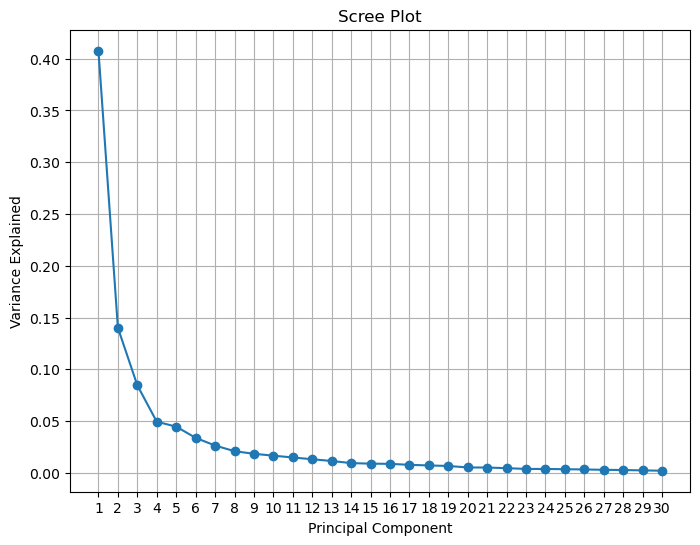

In [38]:
import matplotlib.pyplot as plt

# Variance explained by individual PCs
pca_score = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_score) + 1), pca_score, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(pca_score) + 1))
plt.grid(True)

plt.savefig("variance.png",dpi=600)
plt.show()

In [39]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('mordred_descriptors_updated_agonist.csv')

# Extract the SMILES column from the DataFrame
smiles_list = df['SMILES'].tolist()

# Print the list of SMILES
print(smiles_list)

['CCCCOC(=O)C(C)OC(=O)CCC', 'CCCCC(=O)O', 'CC(C)CCC(=O)O', 'CCCC(C)C(=O)O', 'CCC(C)CC(=O)O', 'CCCCCCCC=CC(=O)O', 'CC(C)CC(=O)O', 'CCCCCCCCC(=O)O', 'CCCC(=O)O', 'CCC(C)C(=O)O', 'CC(C(C)O)O', 'CCCCCCCC(=O)O', 'CCCCCCCC=O', 'CCCCCCCC(=O)OCC', 'CCCCCCC(=O)O', 'CCCCCCC=CC(=O)O', 'CCCCCC(C)CCC(=O)O', 'CCCCCCN', 'CCCCCCO', 'CCCCCCCCS', 'CCCCCCOC(=O)C', 'CCCCCOC(=O)CC', 'CCCCCC(=O)O', 'CCCCCCCCC=O', 'CCCCCC(=O)C=C', 'CC(=CCCC(=CCO)C)C', 'CCCC=CC=O', 'CCC(=O)[O-]', 'CCCCCCCO', 'CCCCCCC=O', 'CSSC', 'CCCCCO', 'CCC=O', 'CC(C)CCOC(=O)C', 'CCC(=O)O', 'CC(=O)[O-]', 'CSCCC=O', 'CCC(C)C=O', 'CC(=O)C(C)=O', 'CCCCC/C=C/C=C/C=O', 'CCCCCC=O', 'CC(O)=O', 'CC=O', 'CCOC(=O)C(C)CC', 'CCCCCC\\C=C\\C=O', 'CC(C)=CCCC(C)(O)C=C', 'CCCC(=O)OCC', 'CC\\C=C/CC=O', 'CC(C)C=O', 'CCOC(=O)C(C)C', 'CCCC\\C=C\\C=C\\C=O', 'CSSSC', 'CC\\C=C/CC(=O)C=C', 'CCCCCC(=O)OCC', 'CC/C=C/CC\\C=C\\C=O', 'CC(C)CCO', 'CCCCCC\\C=C/C=O', 'CSC', 'CS', 'CCC(=O)C(C)=O', 'CC/C=C/CCC=O', 'CCCCCC(=O)C(C)C(=O)C', 'CCO', 'CC(C)=CCCC(=C)C=C', 'CCCCC\\

## The next code performs K-means clustering on the PCA obtained data, to help understand the inherent patterns and groupings within the data. The SMILES present at the centroid of each clusters provide insight into the most common structural features within the cluster. This reduces the complexity of analyzing and highlights the key features of each clusters.
The Scatter plot visualizes the clusters and the SMILES present at the centroid of each clusters, conveying the nature of the clusters.

## The following code comprises of multiple methods which explain why n=5 is the optimal number of clusters.
Akaike Information Crtierion(AIC) and Bayesian Information Criterion(BIC) are statistical models for calculating the optimal number of clusters. Silhouette Score is a metric used to quantify the goodness of clusterings.

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

nclusters = 5  # choose number of cluster
####################################################################################

X_use = X_all_pca
X_main_ids = X_all_ids
X_kmeans = X_all_pca

kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_kmeans)

dists = []
for x in range(len(X_kmeans)):
    delta = [X_kmeans[x,i]-kmeans.cluster_centers_[kmeans.labels_[x],i] for i in range(len(X_kmeans[0]))]
    dist = np.linalg.norm(delta)
    dists.append(dist)

clusters = {}
clusterdists = {}
clustermins=[]
clusterorders_dict={}
clusterorders=np.zeros(X_kmeans.shape[0])

for x in range(nclusters):
    clusters[x] =[i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == x]
    clusterdists[x]=[dists[i] for i in clusters[x]]
    clustermins.append(clusters[x][clusterdists[x].index(min(clusterdists[x]))])
    clusterorders_dict[x]=[y for _,y in sorted(zip(clusterdists[x],clusters[x]))]

for i in clusters:
     print("Cluster", i+1, ":", len(clusters[i]), "data points")

# Calculate BIC and AIC scores
from sklearn.cluster import KMeans


bic_scores=[]
aic_scores=[]

for k_value in range(2, nclusters + 1):
    kmeans_k = KMeans(n_clusters=k_value, random_state=42)
    kmeans_k.fit(X_kmeans)

    # BIC calculation
    bic_score = (-2 * kmeans_k.score(X_kmeans) + np.log(len(X_kmeans)) * k_value * np.log(len(X_kmeans)))

    # AIC calculation
    aic_score = (-2 * kmeans_k.score(X_kmeans) + 2 * len(kmeans_k.cluster_centers_) * X_kmeans.shape[1])

    bic_scores.append(bic_score)
    aic_scores.append(aic_score)

best_k_bic=np.argmin(bic_scores)+2
best_k_aik =np.argmin(aic_scores)+2

print("Best number of clusters based on BIC:", best_k_bic)
print("Best number of clusters based on AIC:", best_k_aik)

# Calculate Silhouette Score

labels=kmeans.labels_
silhouette_avg=silhouette_score(X_use, labels)
print("Silhouette Score for", nclusters, "clusters:", silhouette_avg)

Cluster 1 : 55 data points
Cluster 2 : 11 data points
Cluster 3 : 55 data points
Cluster 4 : 1 data points
Cluster 5 : 13 data points
Best number of clusters based on BIC: 5
Best number of clusters based on AIC: 5
Silhouette Score for 5 clusters: 0.17550033353343963


## The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
Since the AIC and BIC scores for n=k is K, we take other methods into consideration.
The follwing code calculates the Davies Bouldin index, Calinski Harabasz Index, Silhouette score and the Elbow method.

The Davies-Bouldin plot begins to stabilize at n=5, in the Calinski-harabaz plot we see that one of its peak is reached at n=5 both of which suggest n=5 is an optimal number of clusters in our context. The sihouette score also supports n=5. While the elbow plot begins to flatten after and before n=6, n=5 is a more appropriate choice of clusters.

Variance explained by individual PCs: [0.17 0.17 0.11 0.07 0.06 0.05 0.04 0.03 0.03 0.03 0.02 0.02 0.02 0.02
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.
 0.   0.  ] 

Total variance explained by PCs: 0.95
           0          1         2         3         4         5         6  \
0  18.382171  16.147106  7.768925 -5.106971 -7.378954 -0.434234  8.747003   
1   7.360037  -4.847721 -3.141570 -5.282663 -2.117410 -0.435219 -3.552311   
2   8.216342  -3.327044  0.493293 -2.472165 -2.726837 -2.680589 -4.453098   
3   9.116591  -3.499214  1.264326 -1.052063 -1.042766 -0.396962 -3.252333   
4   8.928208  -3.298150  0.888790 -1.109800 -1.176766 -1.997646 -3.919575   

          7         8         9  ...        22        23        24        25  \
0 -3.618296  1.539742 -4.405370  ...  2.926147 -1.951536 -0.274596  0.627273   
1 -2.562165 -0.880791  1.954075  ...  1.837192  1.469697 -0.681582  0.106331   
2  0.192126 -0.371785  3.045594  ...  0.833732  1.532559  0.164138 

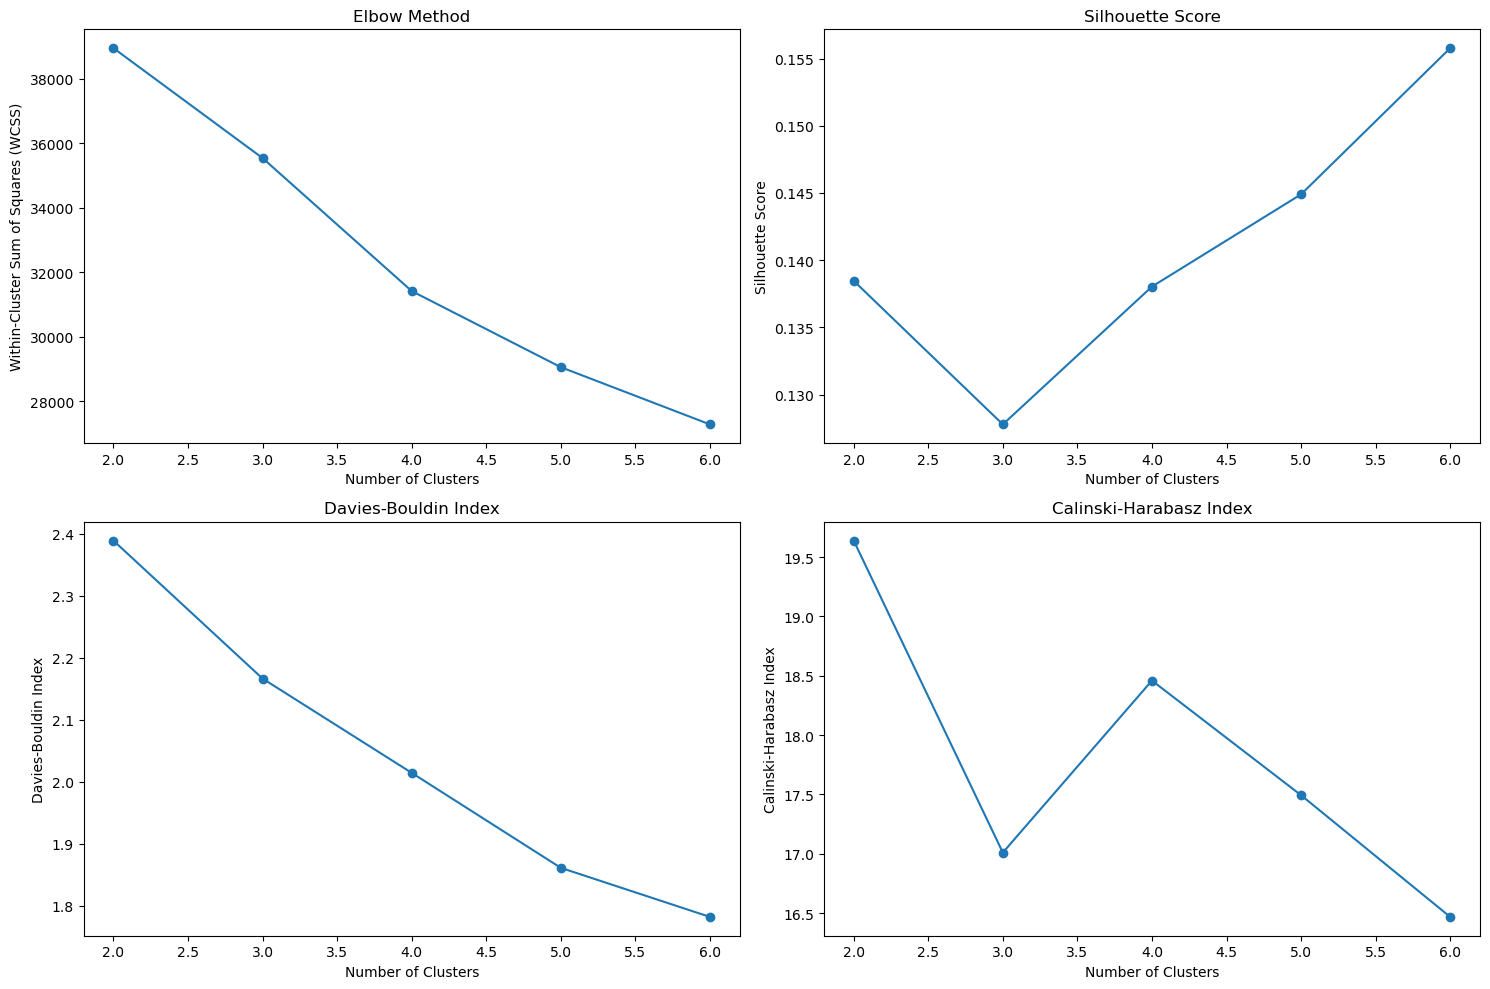

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# PCA and Data Preparation
# Convert index to integer and drop rows with missing values
df.index = df.index.astype(int)
df.dropna(axis=0, inplace=True)

# Select only numeric columns for PCA
numeric_df = df.select_dtypes(include=[np.number])

# If you want to keep track of non-numeric columns (like SMILES strings), you can do this:
non_numeric_df = df.select_dtypes(exclude=[np.number])

# Proceed with PCA on the numeric data
X_all = np.array(numeric_df)
X_all_ids = np.array(numeric_df.index)

scaler = StandardScaler()
X_all_sc = scaler.fit_transform(X_all)  # Standardize the data

pca = PCA(n_components=30)  # Choose the number of PCs
X_all_pca = pca.fit_transform(X_all_sc)  # Apply PCA transformation

pca_score = pca.explained_variance_ratio_
pca_values = pca.singular_values_
print('Variance explained by individual PCs:', np.around(pca.explained_variance_ratio_, decimals=2), '\n')
print('Total variance explained by PCs:', np.around(np.sum(pca.explained_variance_ratio_), decimals=2))

# Recreate DataFrame with original index after PCA transformation
df_pca = pd.DataFrame(X_all_pca, index=X_all_ids)

# If you want to combine the PCA results with the non-numeric data, you can do this:
df_pca_combined = pd.concat([df_pca, non_numeric_df], axis=1)

print(df_pca_combined.head())

# Clustering Evaluation
# Range of cluster counts to consider
cluster_range = range(2, 7)  # You can adjust this range

# Lists to store evaluation scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
wcss = []  # Within-cluster sum of squares for elbow method

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_all_pca)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(X_all_pca, kmeans.labels_))
    
    # Davies-Bouldin Index
    davies_bouldin_scores.append(davies_bouldin_score(X_all_pca, kmeans.labels_))
    
    # Calinski-Harabasz Index
    calinski_harabasz_scores.append(calinski_harabasz_score(X_all_pca, kmeans.labels_))
    
    # WCSS for elbow method
    wcss.append(kmeans.inertia_)

# Create a figure for all the plots
plt.figure(figsize=(15, 10))

# Plotting Elbow Method
plt.subplot(2, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')

# Plotting Silhouette Score
plt.subplot(2, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Plotting Davies-Bouldin Index
plt.subplot(2, 2, 3)
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')

# Plotting Calinski-Harabasz Index
plt.subplot(2, 2, 4)
plt.plot(cluster_range, calinski_harabasz_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a PNG file with 600 DPI
plt.savefig('cluster_evaluation_plots.png', dpi=600)

# Show the plots
plt.show()


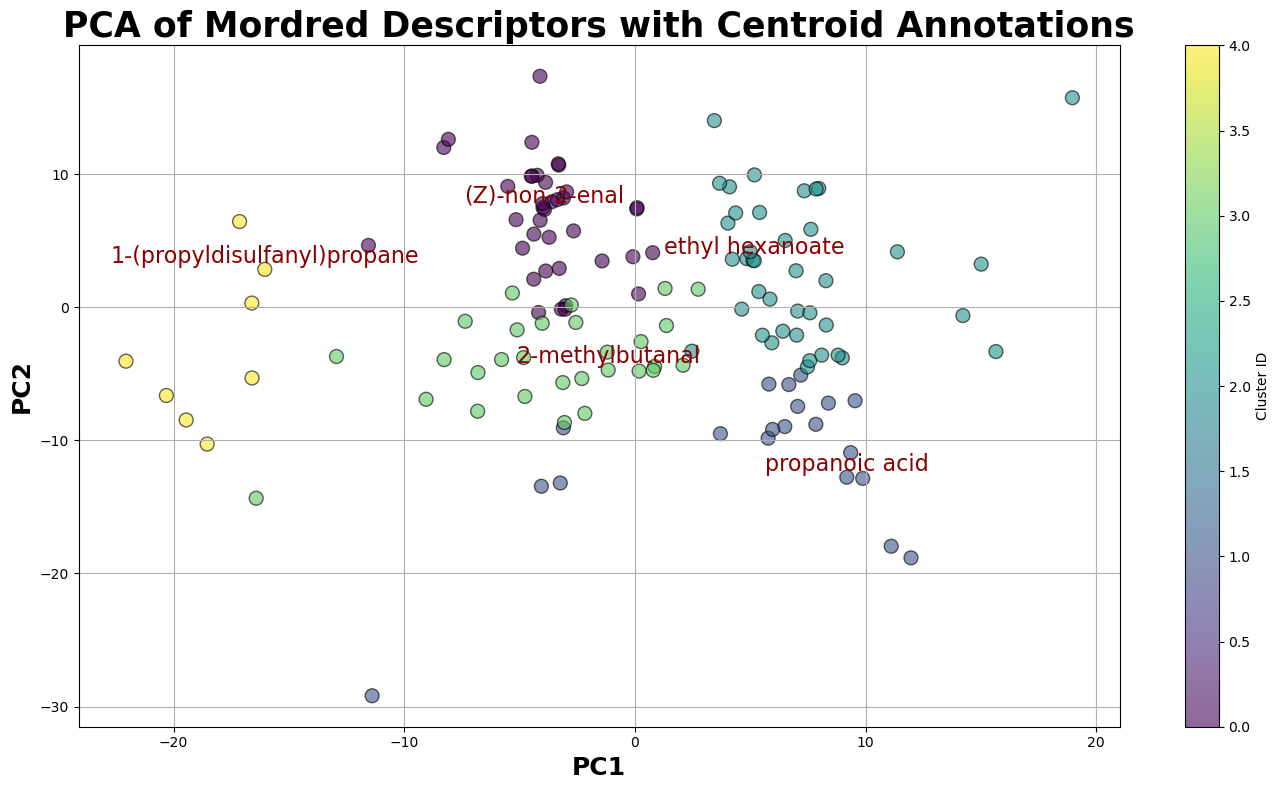

Cluster 1 centroid - SMILES: CCCCCC\C=C/C=O, PubChem name: (Z)-non-2-enal
Cluster 2 centroid - SMILES: CCC(=O)O, PubChem name: propanoic acid
Cluster 3 centroid - SMILES: CCCCCC(=O)OCC, PubChem name: ethyl hexanoate
Cluster 4 centroid - SMILES: CCC(C)C=O, PubChem name: 2-methylbutanal
Cluster 5 centroid - SMILES: CCCSSCCC, PubChem name: 1-(propyldisulfanyl)propane


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import pubchempy as pcp

# Load the CSV file into a DataFrame
df = pd.read_csv('mordred_descriptors_updated_agonist.csv')

# Convert index to integer and drop rows with missing values
df.index = df.index.astype(int)
df.dropna(axis=0, inplace=True)

# Create a DataFrame containing only numeric features for scaling and PCA
X_data = df.drop(columns=['SMILES'])
X_all = np.array(X_data)
X_all_ids = np.array(df.index)

# Scaling the data
scaler = StandardScaler()
X_all_sc = scaler.fit_transform(X_all)

# PCA transformation
pca = PCA(n_components=30)
X_all_pca = pca.fit_transform(X_all_sc)

# Clustering using KMeans
nclusters = 5
kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_all_pca)
dists = [np.linalg.norm(X_all_pca[i] - kmeans.cluster_centers_[kmeans.labels_[i]]) for i in range(len(X_all_pca))]

# Finding centroids
clusters = {i: [] for i in range(nclusters)}
for i, label in enumerate(kmeans.labels_):
    clusters[label].append(i)
clustermins = [min(clusters[i], key=lambda x: dists[x]) for i in range(nclusters)]

# Preparing for visualization
f_ind_1, f_ind_2 = 0, 1
x_min, x_max = X_all_pca[:, f_ind_1].min() - 1, X_all_pca[:, f_ind_1].max() + 1
y_min, y_max = X_all_pca[:, f_ind_2].min() - 1, X_all_pca[:, f_ind_2].max() + 1

# Function to retrieve PubChem names using SMILES
def smiles_to_pubchem_name(smiles):
    try:
        compounds = pcp.get_compounds(smiles, 'smiles')
        return compounds[0].iupac_name if compounds else "Unknown"
    except Exception as e:
        return "Unknown"

# Retrieve PubChem names for centroid molecules
pubchem_at_centroids = [smiles_to_pubchem_name(df.loc[X_all_ids[centroid]]['SMILES']) for centroid in clustermins]

# Font size and point size options
title_fontsize = 25
label_fontsize = 18
annotation_fontsize = 16
point_size = 100  

# Plotting the results
plt.figure(figsize=(14, 8))
plt.scatter(X_all_pca[:, f_ind_1], X_all_pca[:, f_ind_2], c=kmeans.labels_, cmap='viridis', alpha=0.6, s=point_size, edgecolor='k')
for i, centroid in enumerate(clustermins):
    plt.text(X_all_pca[centroid, f_ind_1], X_all_pca[centroid, f_ind_2] + 0.5, pubchem_at_centroids[i], fontsize=annotation_fontsize, ha='center', color='darkred', wrap=True)
plt.title('PCA of Mordred Descriptors with Centroid Annotations', fontsize=title_fontsize, fontweight='bold')
plt.xlabel('PC1', fontsize=label_fontsize, fontweight='bold')
plt.ylabel('PC2', fontsize=label_fontsize, fontweight='bold')
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.tight_layout()
plt.savefig("mordred_pca_plot_wider.png", dpi=800)
plt.show()

# Printing centroid PubChem names and SMILES
for i, centroid in enumerate(clustermins):
    smiles = df.loc[X_all_ids[centroid]]['SMILES']
    name = pubchem_at_centroids[i]
    print(f"Cluster {i+1} centroid - SMILES: {smiles}, PubChem name: {name}")

## The structures closest to the centroids are printed below

In [34]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean

# Assuming df, X_all_pca, kmeans, nclusters, and clustermins are already defined from previous cells

def get_top_molecules(X, labels, centroids, df, clustermins, n_top=4):
    results = {}
    for i in range(len(centroids)):
        # Get indices of molecules in this cluster
        cluster_indices = np.where(labels == i)[0]
        
        # Calculate distances to centroid for all molecules in this cluster
        distances = [euclidean(X[j], centroids[i]) for j in cluster_indices]
        
        # Sort indices by distance
        sorted_indices = [x for _, x in sorted(zip(distances, cluster_indices))]
        
        # Get centroid molecule (already identified) and next 4 closest molecules
        top_indices = [clustermins[i]] + [idx for idx in sorted_indices if idx != clustermins[i]][:n_top]
        
        # Retrieve SMILES and calculate distances for top molecules
        top_molecules = []
        for idx in top_indices:
            smiles = df.iloc[idx]['SMILES']
            distance = euclidean(X[idx], centroids[i])
            top_molecules.append((smiles, distance))
        
        results[f"Cluster_{i+1}"] = top_molecules
    
    return results

# Get centroid molecule and 4 next closest molecules for each cluster
top_molecules = get_top_molecules(X_all_pca, kmeans.labels_, kmeans.cluster_centers_, df, clustermins, n_top=4)

# Print results
for cluster, molecules in top_molecules.items():
    print(f"\n{cluster}:")
    for i, (smiles, distance) in enumerate(molecules):
        if i == 0:
            print(f"  Centroid Molecule:")
        elif i == 1:
            print(f"  Next 4 Closest Molecules:")
        print(f"    {i}. SMILES: {smiles}")
        print(f"       Distance to centroid: {distance:.4f}")

# Create a DataFrame with the results
results_df = pd.DataFrame([
    {
        'Cluster': f"{cluster}",
        'Rank': 'Centroid' if i == 0 else f'Top_{i}',
        'SMILES': mol[0],
        'Distance': mol[1]
    }
    for cluster, molecules in top_molecules.items()
    for i, mol in enumerate(molecules)
])

# Display the DataFrame
print("\nResults DataFrame:")
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('top_molecules_per_cluster.csv', index=False)
print("\nResults saved to 'top_molecules_per_cluster.csv'")


Cluster_1:
  Centroid Molecule:
    0. SMILES: CCCCCC\C=C/C=O
       Distance to centroid: 3.4833
  Next 4 Closest Molecules:
    1. SMILES: CCCCCC\C=C\C=O
       Distance to centroid: 3.5127
    2. SMILES: CCCCC\C=C/C=O
       Distance to centroid: 4.7045
    3. SMILES: CCCCCCC\C=C\C=O
       Distance to centroid: 5.3777
    4. SMILES: CCCCCCC\C=C/C=O
       Distance to centroid: 5.4083

Cluster_2:
  Centroid Molecule:
    0. SMILES: CCCC(=O)O
       Distance to centroid: 9.6614
  Next 4 Closest Molecules:
    1. SMILES: CCOC(C)=O
       Distance to centroid: 9.7459
    2. SMILES: CCC(C)C(=O)O
       Distance to centroid: 10.0639
    3. SMILES: CC(C)C(O)=O
       Distance to centroid: 10.0794
    4. SMILES: CCC(=O)O
       Distance to centroid: 10.1630

Cluster_3:
  Centroid Molecule:
    0. SMILES: CCCCCC(=O)OCC
       Distance to centroid: 7.9979
  Next 4 Closest Molecules:
    1. SMILES: CCCCC(=O)OCC
       Distance to centroid: 8.4760
    2. SMILES: CCCCCOC(=O)CC
       Distance 

In [35]:
smiles = list(mols['SMILES'])

closest_to_centroids = []
for i in range(nclusters):
    cluster_molecules = [smiles[j] for j in clusters[i]]
    cluster_distances = [dists[j] for j in clusters[i]]
    sorted_indices = np.argsort(cluster_distances)
    closest_molecules = [cluster_molecules[j] for j in sorted_indices[:4]]
    closest_to_centroids.extend(closest_molecules)

count = len(closest_to_centroids)
subms = []
for i in closest_to_centroids:
    x = Chem.MolFromSmiles(i)
    subms.append(x)

cluster_labels = []
for i in range(nclusters):
    for j in range(4):
        cluster_labels.append(f"Cluster {i+1} - Mol {j+1}")

molsPerRow = 4
subImgSize = (400, 400)
nRows = -(count // -molsPerRow)
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
img = rdMolDraw2D.MolDraw2DCairo(fullSize[0], fullSize[1], subImgSize[0], subImgSize[1])  # setting up the image
img.drawOptions().legendFontSize = 20
img.DrawMolecules(subms[:], legends=cluster_labels[:])
img.SetFontSize(40)
img.FinishDrawing()

with open('top_molecules.png', dpi = 800, 'wb+') as wfp:  # opening a png file, goes into current folder
    wfp.write(img.GetDrawingText())  # saving in the image
Image.open('top_molecules.png')  # opening it in the notebook

SyntaxError: positional argument follows keyword argument (3292094709.py, line 32)

## Get the pdb structures of these 20 molecules 

In [ ]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem

# List of SMILES strings
smiles_list = [
    "CCCCCC\C=C\C=O",
    "CCCCCC\C=C/C=O",
    "CCCCC\C=C/C=O",
    "CCC=CCC=CCC=O",
    "CCC(=O)O",
    "CCCC(=O)O",
    "CC(C)C(O)=O",
    "CCC(C)C(=O)O",
    "CCCCCC(=O)OCC",
    "CCCCC(=O)OCC",
    "CCCCCOC(=O)CC",
    "CCCCCCOC(=O)C",
    "CCC(C)CO",
    "CC(C)CCO",
    "CCC(C)C=O",
    "CC\C=C/CCO",
    "CCCSSCCC",
    "CSCSC",
    "CSSSC",
    "CSSC"
]

# Corresponding common names
common_names = [
        "trans-2-Nonenal",
        "Z-Non-2-enal",
        "2-Octenal",
        "36-nonadienal",
        "propionic_acid",
        "butyric_acid",
        "ISOBUTYRIC_ACID",
        "2-Methylbutanoic_acid"
        "ETHYL_HEXANOATE",
        "ETHYL_VALERATE",
        "Pentyl_propionate",
        "Hexyl_acetate",
        "2-METHYL-1-BUTANOL",
        "Isoamyl_alcohol",
        "2-Methylbutyraldehyde",
        "cis-3-Hexen-1-ol",
        "Dipropyl_disulfide",
        "Bis-methylthio-methane",
        "Dimethyl_trisulfide",
        "Dimethyl_Disulfide"
]

# Create folder TOP_20 if not exists
os.makedirs("TOP_20", exist_ok=True)

# Function to save PDB structure
def save_pdb(smiles, name):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.UFFOptimizeMolecule(mol)
    pdb_block = Chem.MolToPDBBlock(mol)
    with open(f"TOP_20/{name}.pdb", "w") as f:
        f.write(pdb_block)

# Save PDB structures
for smiles, name in zip(smiles_list, common_names):
    save_pdb(smiles, name)


## Co-relation Analysis for the selected descriptors over the range of molecules.
First, we take 7 descriptors that define the drug-likliness and odor-ness of our molecules. These include:

1) Quantitative Estimate of Druglikeness
2) Logp(lipophilicity)
3) Molecular Weight
4) Topology Polar Surface Area
5) Number of Rotatable Bonds
6) Radius of Gyration

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, QED, MolSurf
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds
from rdkit.Chem import Descriptors3D
import pandas as pd

In [ ]:
# Define the list of SMILES strings
smiles_list = [
"CCCCCC\C=C\C=O", "CCCCCC\C=C/C=O","CCCCC\C=C/C=O", "CCC=CCC=CCC=O","CCC(=O)O","CCCC(=O)O","CC(C)C(O)=O",
"CCC(C)C(=O)O","CCCCCC(=O)OCC","CCCCC(=O)OCC","CCCCCOC(=O)CC","CCCCCCOC(=O)C","CCC(C)CO","CC(C)CCO",
"CCC(C)C=O","CC\C=C/CCO","CCCSSCCC","CSCSC","CSSSC","CSSC"
]

# Initialize empty lists to store calculated properties
qed_values = []
logp_values = []
mol_weight_values = []
tpsa_values = []
num_rotatable_bonds_values = []

for smiles in smiles_list:
    # Create molecule object
    molecule = Chem.MolFromSmiles(smiles)

    # Calculate properties and append to respective lists
    qed_values.append(QED.qed(molecule))
    logp_values.append(Descriptors.MolLogP(molecule))
    mol_weight_values.append(Descriptors.MolWt(molecule))
    tpsa_values.append(Descriptors.TPSA(molecule))
    num_rotatable_bonds_values.append(Descriptors.NumRotatableBonds(molecule))

# Create dataframe
df = pd.DataFrame({
    'SMILES': smiles_list,
    'QED': qed_values,
    'LogP': logp_values,
    'Molecular_Weight': mol_weight_values,
    'Topological_Polar_Surface_Area': tpsa_values,
    'Number_of_Rotatable_Bonds': num_rotatable_bonds_values,
})

# Save dataframe to a CSV file
df.to_csv("plot_data.csv", index=False)

## Calculating Radius of Gyration

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors3D

In [ ]:
# Define the list of SMILES strings
smiles_list = [
"CCCCCC\C=C\C=O", "CCCCCC\C=C/C=O","CCCCC\C=C/C=O", "CCC=CCC=CCC=O","CCC(=O)O","CCCC(=O)O","CC(C)C(O)=O",
"CCC(C)C(=O)O","CCCCCC(=O)OCC","CCCCC(=O)OCC","CCCCCOC(=O)CC","CCCCCCOC(=O)C","CCC(C)CO","CC(C)CCO",
"CCC(C)C=O","CC\C=C/CCO","CCCSSCCC","CSCSC","CSSSC","CSSC"
]

radius_of_gyration = []

for smiles in smiles_list:
    # Create a molecule from the SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate a 3D conformation using the ETKDG method
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())

    # Compute the descriptors
    radius_of_gyration.append(Descriptors3D.RadiusOfGyration(molecule))


# Load the existing DataFrame
df = pd.read_csv("plot_data.csv")

# Add the radius of gyration to the DataFrame
df['RadiusOfGyration'] = radius_of_gyration

# Save the updated DataFrame back to the CSV file
df.to_csv("plot_data.csv", index=False)

In [ ]:
df_updated = pd.read_csv("plot_data.csv")
df_updated

,SMILES,QED,LogP,Molecular_Weight,Topological_Polar_Surface_Area,Number_of_Rotatable_Bonds,RadiusOfGyration
0,CCCCCC\C=C\C=O,0.314760,2.7119,140.226,17.07,6,3.233467
1,CCCCCC\C=C/C=O,0.314760,2.7119,140.226,17.07,6,3.157950
2,CCCCC\C=C/C=O,0.313677,2.3218,126.199,17.07,5,2.720531
3,CCC=CCC=CCC=O,0.421095,2.4879,138.210,17.07,5,3.187139
4,CCC(=O)O,0.490845,0.4810,74.079,37.30,1,1.558886
5,CCCC(=O)O,0.543441,0.8711,88.106,37.30,2,1.907807
6,CC(C)C(O)=O,0.512604,0.7270,88.106,37.30,1,1.677693
7,CCC(C)C(=O)O,0.566819,1.1171,102.133,37.30,2,1.842107
8,CCCCCC(=O)OCC,0.436174,2.1298,144.214,26.30,5,2.924072
9,CCCCC(=O)OCC,0.541673,1.7397,130.187,26.30,4,2.694746


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

# Load the data
df = pd.read_csv('plot_data.csv')

# List of SMILES strings
smiles_list = df['SMILES'].tolist()

# Initialize list to store common names
common_names = []

# Loop over the list
for smiles in smiles_list:
    # Check if SMILES string is not None
    if smiles is not None:
        try:
            # Convert SMILES to RDKit Mol object
            mol = Chem.MolFromSmiles(smiles)
            
            if mol:
                # Get the common name using the molecular formula
                common_name = Chem.rdMolDescriptors.CalcMolFormula(mol)
                common_names.append(common_name)
            else:
                common_names.append(None)
        except Exception as e:
            print(f"Error processing SMILES: {smiles}, Exception: {e}")
            common_names.append(None)
    else:
        common_names.append(None)

# Add the common names as a new column to the dataframe
df.insert(0, 'Common_name', common_names)

# Save the DataFrame to a new CSV file
df.to_csv("plot_data_with_names.csv", index=False)

df.head(20)

,Common_name,SMILES,QED,LogP,Molecular_Weight,Topological_Polar_Surface_Area,Number_of_Rotatable_Bonds,RadiusOfGyration
0,C9H16O,CCCCCC\C=C\C=O,0.314760,2.7119,140.226,17.07,6,3.233467
1,C9H16O,CCCCCC\C=C/C=O,0.314760,2.7119,140.226,17.07,6,3.157950
2,C8H14O,CCCCC\C=C/C=O,0.313677,2.3218,126.199,17.07,5,2.720531
3,C9H14O,CCC=CCC=CCC=O,0.421095,2.4879,138.210,17.07,5,3.187139
4,C3H6O2,CCC(=O)O,0.490845,0.4810,74.079,37.30,1,1.558886
5,C4H8O2,CCCC(=O)O,0.543441,0.8711,88.106,37.30,2,1.907807
6,C4H8O2,CC(C)C(O)=O,0.512604,0.7270,88.106,37.30,1,1.677693
7,C5H10O2,CCC(C)C(=O)O,0.566819,1.1171,102.133,37.30,2,1.842107
8,C8H16O2,CCCCCC(=O)OCC,0.436174,2.1298,144.214,26.30,5,2.924072
9,C7H14O2,CCCCC(=O)OCC,0.541673,1.7397,130.187,26.30,4,2.694746


## Heatmap generation - The above analysis is further used to create a heatmap to visually represent the relationship between the descriptors.

                       QED      LogP  Mol.weight      TPSA  Rotatable Bonda  \
QED               1.000000 -0.707563   -0.588473  0.266033        -0.742227   
LogP             -0.707563  1.000000    0.918521 -0.567251         0.838362   
Mol.weight       -0.588473  0.918521    1.000000 -0.291268         0.899306   
TPSA              0.266033 -0.567251   -0.291268  1.000000        -0.109819   
Rotatable Bonda  -0.742227  0.838362    0.899306 -0.109819         1.000000   
RadiusOfGyration -0.699185  0.829537    0.911769 -0.102033         0.978793   

                  RadiusOfGyration  
QED                      -0.699185  
LogP                      0.829537  
Mol.weight                0.911769  
TPSA                     -0.102033  
Rotatable Bonda           0.978793  
RadiusOfGyration          1.000000  


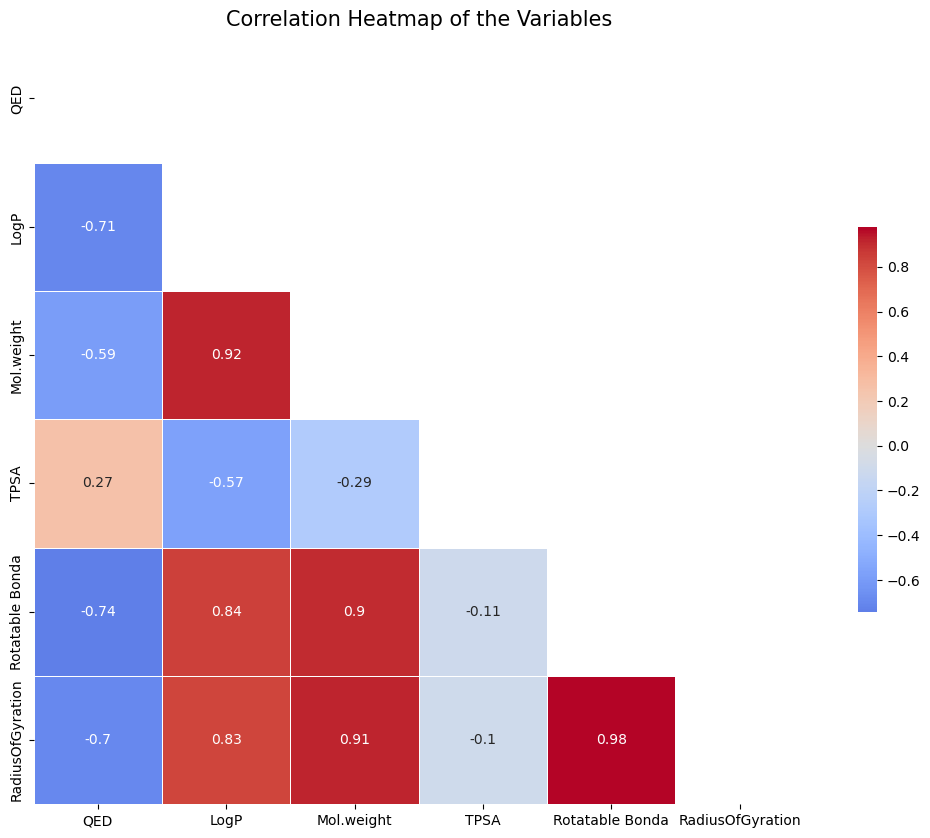

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the csv file
data = pd.read_csv('plot_data_with_names.csv')

# Select only the numeric columns for the correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix using Pearson's correlation coefficient
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set the size of the figure
plt.figure(figsize=(14, 10))

# Generate a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Set the title of the figure
plt.title('Correlation Heatmap of the Variables', fontsize=15)

# Show the plot
plt.savefig("Corelation_heat_plot.png",dpi=600)
plt.show()

## The correlation analysis is extended to the appended list of the 62 odorants and the 20 most similar molecules.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, QED, MolSurf
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds
from rdkit.Chem import Descriptors3D
import pandas as pd

In [ ]:
input_csv_file = "OR_AGONIST_update2_NOCYC.csv"
data = pd.read_csv(input_csv_file)

# Extract SMILES column from the dataframe
smiles_list = data["SMILES"].tolist()

# Initialize empty lists to store calculated properties
qed_values = []
logp_values = []
mol_weight_values = []
tpsa_values = []
num_rotatable_bonds_values = []

for smiles in smiles_list:
    # Create molecule object
    molecule = Chem.MolFromSmiles(smiles)

    # Calculate properties and append to respective lists
    qed_values.append(QED.qed(molecule))
    logp_values.append(Descriptors.MolLogP(molecule))
    mol_weight_values.append(Descriptors.MolWt(molecule))
    tpsa_values.append(Descriptors.TPSA(molecule))
    num_rotatable_bonds_values.append(Descriptors.NumRotatableBonds(molecule))

# Create dataframe
df = pd.DataFrame({
    'SMILES': smiles_list,
    'QED': qed_values,
    'LogP': logp_values,
    'Molecular_Weight': mol_weight_values,
    'Topological_Polar_Surface_Area': tpsa_values,
    'Number_of_Rotatable_Bonds': num_rotatable_bonds_values,
})

# Save dataframe to a CSV file
df.to_csv('plotting_62X.csv', index=False)

## Calculating the Radius of Gyration



In [ ]:
input_csv_file = "OR_AGONIST_update2_NOCYC.csv"
data = pd.read_csv(input_csv_file)

# Extract SMILES column from the dataframe
smiles_list = data["SMILES"].tolist()
radius_of_gyration = []

for smiles in smiles_list:
    # Create a molecule from the SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate a 3D conformation using the ETKDG method
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())

    # Compute the descriptors
    radius_of_gyration.append(Descriptors3D.RadiusOfGyration(molecule))


# Load the existing DataFrame
df = pd.read_csv('plotting_62X.csv')

# Add the radius of gyration to the DataFrame
df['RadiusOfGyration'] = radius_of_gyration

# Save the updated DataFrame back to the CSV file
df.to_csv('plotting_NONCX.csv', index=False)

In [ ]:
df_updated = pd.read_csv('plotting_NONCX.csv')
df_updated

,SMILES,QED,LogP,Molecular_Weight,Topological_Polar_Surface_Area,Number_of_Rotatable_Bonds,RadiusOfGyration
0,CCCCOC(=O)C(C)OC(=O)CCC,0.482575,2.0615,216.277,52.60,7,3.528937
1,CCCCC(=O)O,0.582072,1.2612,102.133,37.30,3,1.927542
2,CC(C)CCC(=O)O,0.606401,1.5072,116.160,37.30,3,2.128624
3,CCCC(C)C(=O)O,0.606401,1.5072,116.160,37.30,3,1.988005
4,CCC(C)CC(=O)O,0.606401,1.5072,116.160,37.30,3,2.181004
5,CCCCCCCC=CC(=O)O,0.470804,2.9877,170.252,37.30,7,3.105849
6,CC(C)CC(=O)O,0.566819,1.1171,102.133,37.30,2,1.787025
7,CCCCCCCCC(=O)O,0.578320,2.8216,158.241,37.30,7,3.140992
8,CCC(C)CC(=O)O,0.606401,1.5072,116.160,37.30,3,2.089370
9,CC(C)CCC(=O)O,0.606401,1.5072,116.160,37.30,3,2.370734


## independent molecular analysis